## **DATA SCIENCE PROJECT ON INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS**

## **BUISNESS CASE: BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE**

### **DATA PRE-PROCESSING & FEATURE SELECTION:**

#### **Importing  liabraries**

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# avoid the warnings
import warnings
warnings.filterwarnings('ignore')

### Reading excel file

In [2]:
df = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls")
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [4]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

##### Categorical Features:
EmpNumber, 
Gender, 
EducationBackground, 
MaritalStatus, 
EmpDepartment, 
EmpJobRole, 
BusinessTravelFrequency, 
OverTime, 
Attrition

##### Numerical Features:
Age, 
DistanceFromHome, 
EmpHourlyRate, 
NumCompaniesWorked, 
EmpLastSalaryHikePercent, 
TotalWorkExperienceInYears, 
TrainingTimesLastYear, 
ExperienceYearsAtThisCompany, 
ExperienceYearsInCurrentRole, 
YearsSinceLastPromotion, 
YearsWithCurrManager

##### Ordinal Features:
EmpEducationLevel, 
EmpEnvironmentSatisfaction, 
EmpJobInvolvement, 
EmpJobLevel, 
EmpJobSatisfaction, 
EmpRelationshipSatisfaction, 
EmpWorkLifeBalance, 
PerformanceRating

#### Technique Used:
* Mannual Encoding: Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.
* Frequency Encoding: Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.


In [5]:
df['Gender'].value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

In [6]:
# Use mannual encoding to map the labels
df.Gender = df.Gender.map({'Male':1,'Female':0})

In [7]:
df['EducationBackground'].value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [8]:
# Use frequency encoding
df.loc[df['EducationBackground']=='Life Sciences','EducationBackground']=5
df.loc[df['EducationBackground']=='Medical','EducationBackground']=4
df.loc[df['EducationBackground']=='Marketing','EducationBackground']=3
df.loc[df['EducationBackground']=='Technical Degree','EducationBackground']=2
df.loc[df['EducationBackground']=='Other','EducationBackground']=1
df.loc[df['EducationBackground']=='Human Resources','EducationBackground']=0

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [10]:
# Use mannual encoding
df.MaritalStatus = df.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [11]:
df['EmpDepartment'].value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [12]:
# Use Frequency encoding
df.loc[df['EmpDepartment']=='Sales','EmpDepartment']=5
df.loc[df['EmpDepartment']=='Development','EmpDepartment']=4
df.loc[df['EmpDepartment']=='Research & Development','EmpDepartment']=3
df.loc[df['EmpDepartment']=='Human Resources','EmpDepartment']=2
df.loc[df['EmpDepartment']=='Finance','EmpDepartment']=1
df.loc[df['EmpDepartment']=='Data Science','EmpDepartment']=0

In [13]:
df['EmpJobRole'].value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [14]:
# Use frequency encoding because feature contain a lots of label
df.loc[df['EmpJobRole']=='Sales Executive','EmpJobRole']=18
df.loc[df['EmpJobRole']=='Developer','EmpJobRole']=17
df.loc[df['EmpJobRole']=='Manager R&D','EmpJobRole']=16
df.loc[df['EmpJobRole']=='Research Scientist','EmpJobRole']=15
df.loc[df['EmpJobRole']=='Sales Representative','EmpJobRole']=14
df.loc[df['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
df.loc[df['EmpJobRole']=='Senior Developer','EmpJobRole']=12
df.loc[df['EmpJobRole']=='Manager','EmpJobRole']=11
df.loc[df['EmpJobRole']=='Finance Manager','EmpJobRole']=10
df.loc[df['EmpJobRole']=='Human Resources','EmpJobRole']=9
df.loc[df['EmpJobRole']=='Technical Lead','EmpJobRole']=8
df.loc[df['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
df.loc[df['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
df.loc[df['EmpJobRole']=='Data Scientist','EmpJobRole']=5
df.loc[df['EmpJobRole']=='Research Director','EmpJobRole']=4
df.loc[df['EmpJobRole']=='Business Analyst','EmpJobRole']=3
df.loc[df['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
df.loc[df['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
df.loc[df['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [15]:
df['BusinessTravelFrequency'].value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [16]:
# Use mannual encoding Because feature contain minimum label
df.BusinessTravelFrequency = df.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})


In [17]:
df['EmpRelationshipSatisfaction'].value_counts()

EmpRelationshipSatisfaction
3    379
4    355
2    247
1    219
Name: count, dtype: int64

In [18]:
df['OverTime'].value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [19]:
# Use mannual Encoding
df.OverTime = df.OverTime.map({'No':1,'Yes':0})

In [20]:
df['Attrition'].value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [21]:
# Use Mannual encoding because feature contain less no of label
df.Attrition = df.Attrition.map({'No':1,'Yes':0})

In [22]:
df['PerformanceRating'].value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

In [23]:
# List of numerical features
numerical_features = df.select_dtypes(include=['number']).columns
print("Numerical Features:")
print(numerical_features)


Numerical Features:
Index(['Age', 'Gender', 'MaritalStatus', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')


In [24]:
# Display the first few rows of numerical features
print("Numerical Features Data:")
df[numerical_features].head()


Numerical Features Data:


,Age,Gender,MaritalStatus,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,1,2,10,3,4,55,3,2,...,4,10,2,2,10,7,0,8,1,3
1,47,1,1,2,14,4,4,42,3,2,...,4,20,2,3,7,7,1,7,1,3
2,40,1,2,1,5,4,4,48,2,3,...,3,20,2,3,18,13,1,12,1,4
3,41,1,0,2,10,4,2,73,2,5,...,2,23,2,2,21,6,12,6,1,3
4,60,1,1,2,16,4,1,84,3,2,...,4,10,1,3,2,2,2,2,1,3


#### CHECK OUTLIERS AND IMPUTE OUTLIERS:

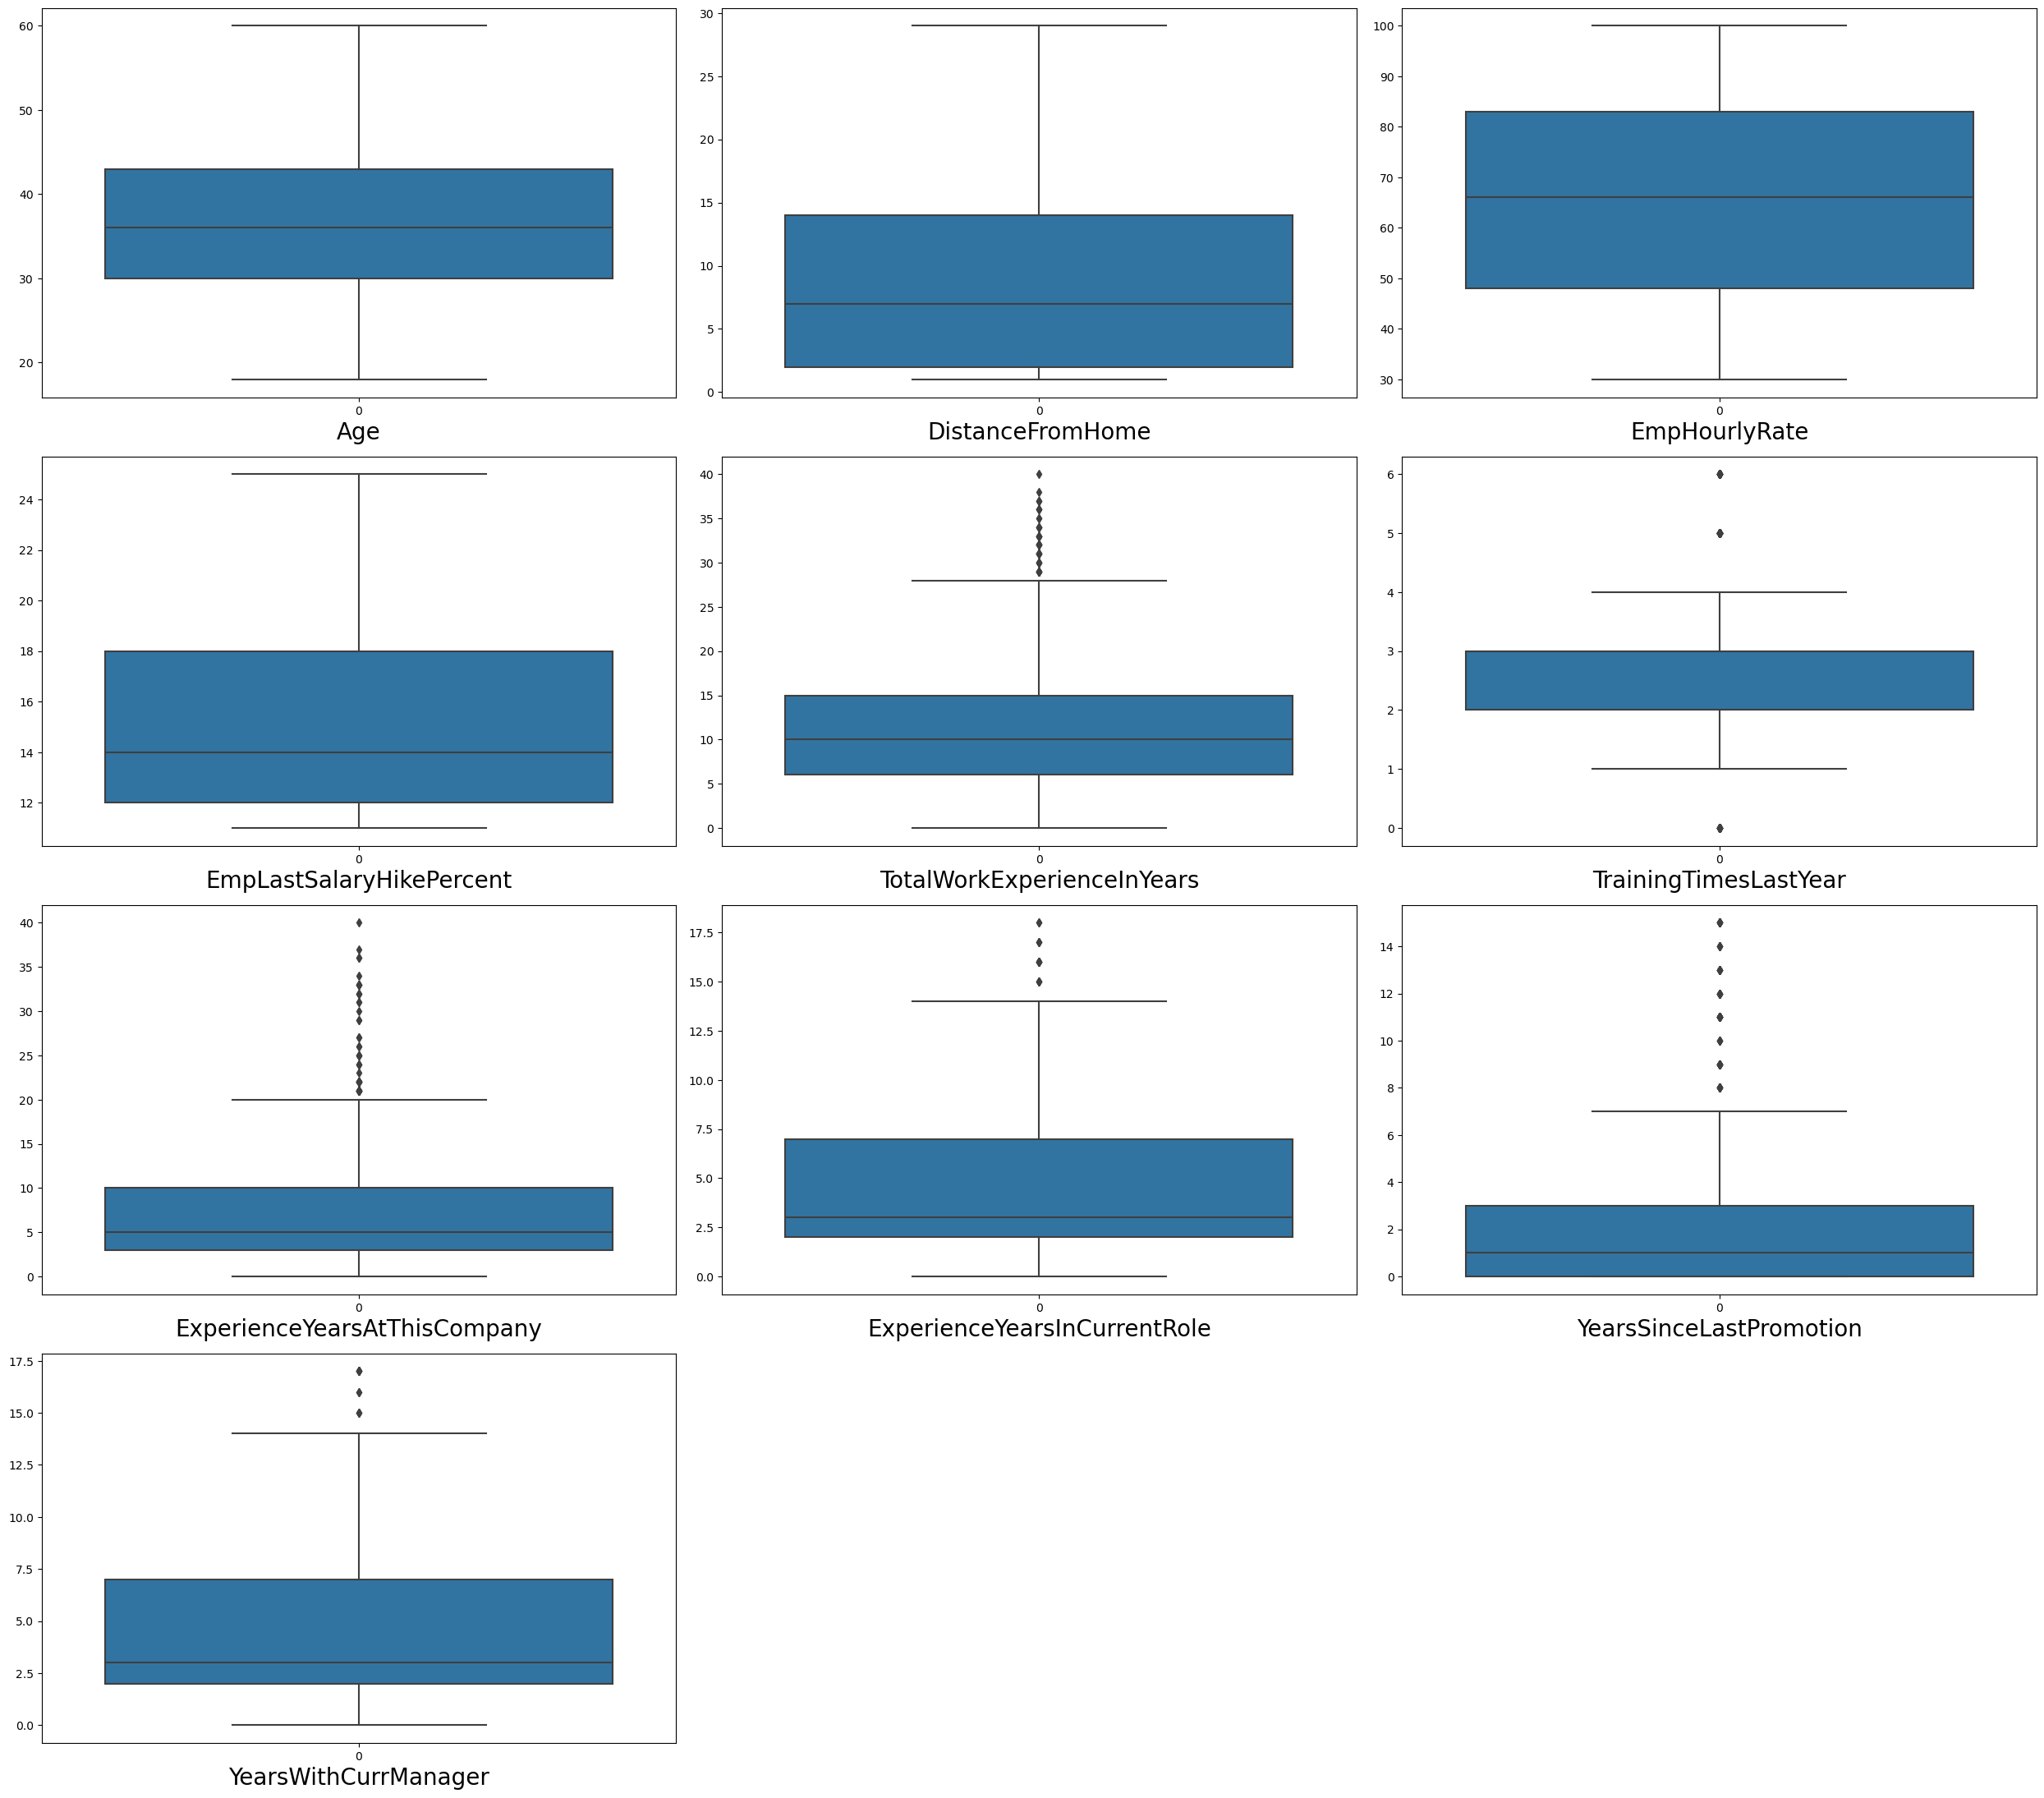

In [25]:
data = df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(25,22)) # defining canvas size
plotno = 1 # counter

for column in data: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(data[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() 


Here we are use inter quatile range to impute the outlier, becuase data is not normally distributed.
* IQR:
IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles

In [26]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = df['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [27]:
# Impute outlier
df.loc[df['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()
# filtering data after imputation
df.loc[df['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [28]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['TrainingTimesLastYear'].quantile(0.25)
Q3 = df['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [29]:
# Impute outlier in max & minmum limit
df.loc[df['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
df.loc[df['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
# Filtering the min limit
df.loc[df['TrainingTimesLastYear'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [30]:
# Filtering the max limit
df.loc[df['TrainingTimesLastYear'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [31]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = df['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [32]:
# Impute outlier
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()
# Filtering the data
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [33]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = df['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [34]:
# Impute the outlier
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()
# Filtering the data
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [35]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = df['YearsSinceLastPromotion'].quantile(0.25)
Q3 = df['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [36]:
# impute outlier
df.loc[df['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()
# Filtering data
df.loc[df['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [37]:
# use iqr because some skewed in data
iqr = stats.iqr(df['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = df['YearsWithCurrManager'].quantile(0.25)
Q3 = df['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [38]:
# impute outlier
df.loc[df['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()
# Filtering the data
df.loc[df['YearsWithCurrManager'] >max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


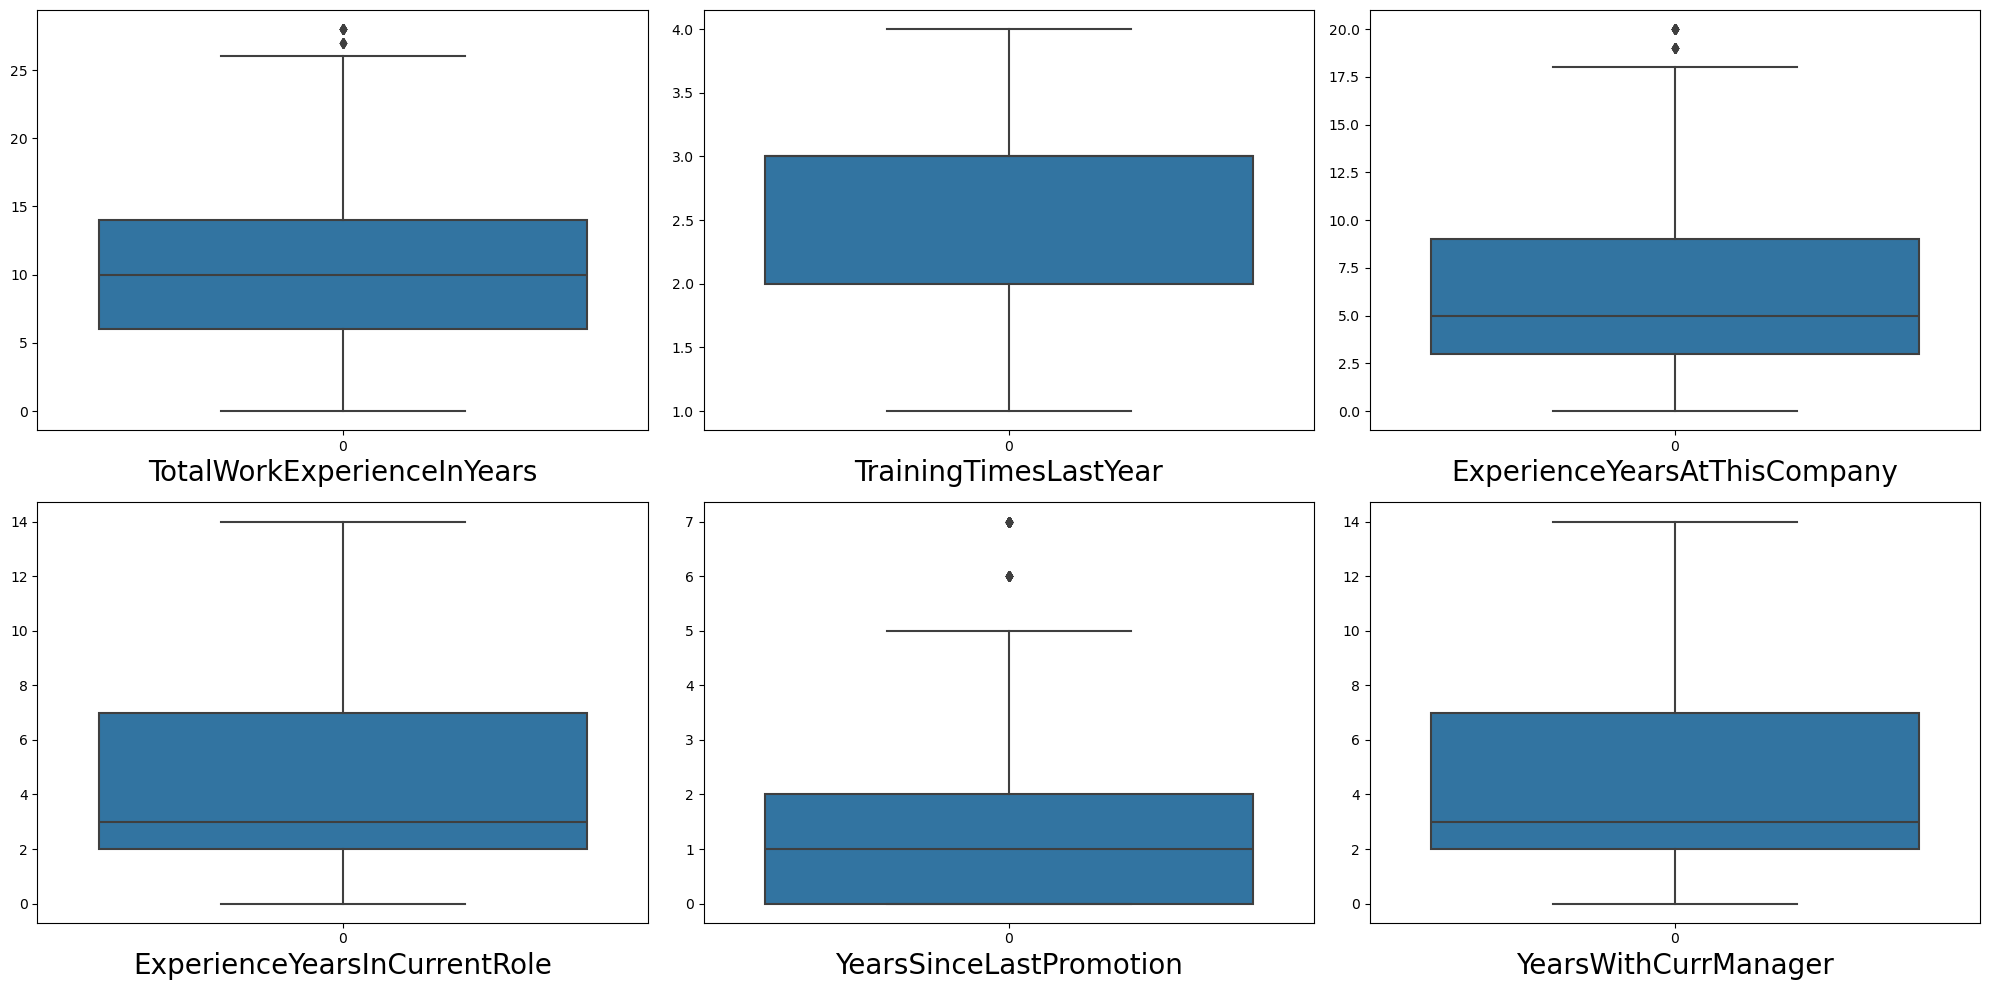

In [39]:
data = df[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) # defining canvas size
plotno = 1 # counter

for column in data: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(2,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(data[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

##### Observation:
Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier.
##### FEATURE TRANSFORMATION
From the last EDA file we get the yearsince last promotion feature have some skewed in data, so we are going to use square root transformation.

#### check Skewness, Kurtosis

In [40]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for numerical features
skewness = df[numerical_features].apply(lambda x: skew(x.dropna()))
kurtosis_values = df[numerical_features].apply(lambda x: kurtosis(x.dropna()))

print("Skewness of Numerical Features:")
print(skewness)

print("\nKurtosis of Numerical Features:")
print(kurtosis_values)


Skewness of Numerical Features:
Age                             0.383665
Gender                         -0.426014
MaritalStatus                  -0.439116
BusinessTravelFrequency        -1.401003
DistanceFromHome                0.961752
EmpEducationLevel              -0.250660
EmpEnvironmentSatisfaction     -0.307280
EmpHourlyRate                  -0.035121
EmpJobInvolvement              -0.557149
EmpJobLevel                     1.022773
EmpJobSatisfaction             -0.323871
NumCompaniesWorked              1.047324
OverTime                       -0.903437
EmpLastSalaryHikePercent        0.807642
EmpRelationshipSatisfaction    -0.318165
TotalWorkExperienceInYears      0.799671
TrainingTimesLastYear          -0.118438
EmpWorkLifeBalance             -0.538557
ExperienceYearsAtThisCompany    1.086265
ExperienceYearsInCurrentRole    0.666469
YearsSinceLastPromotion         1.664675
YearsWithCurrManager            0.625555
Attrition                      -1.978823
PerformanceRating        

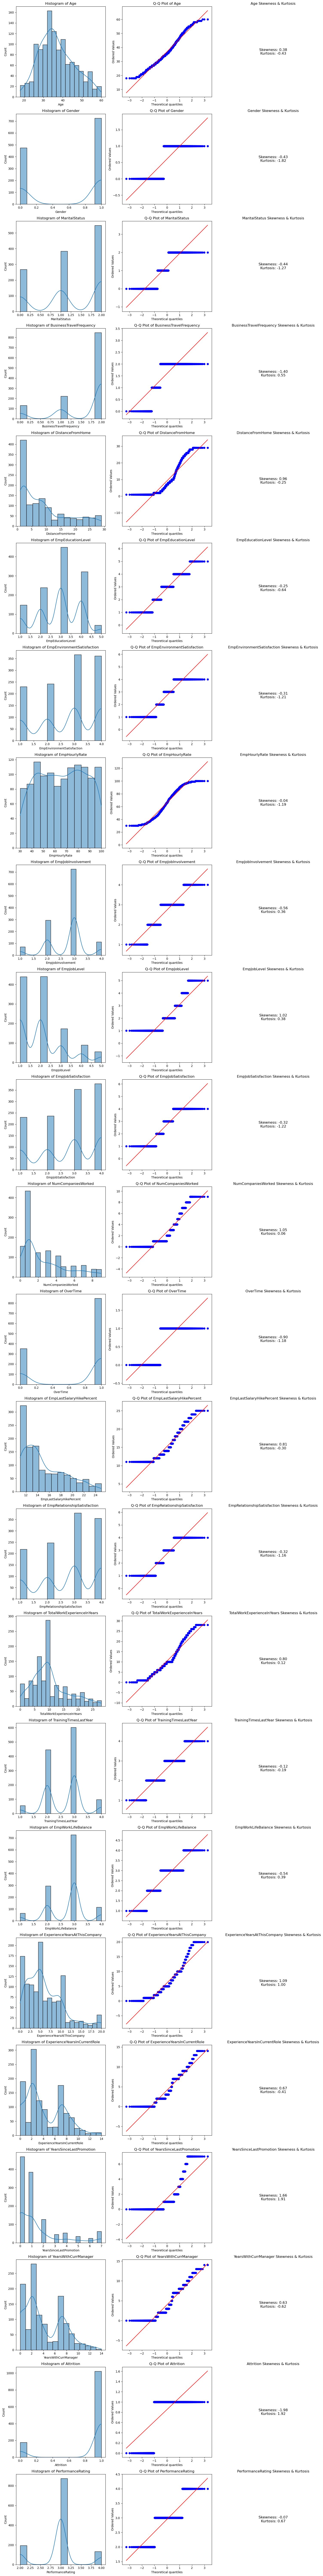

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis, probplot

# Define the number of subplots
num_features = len(numerical_features)
fig, axes = plt.subplots(nrows=num_features, ncols=3, figsize=(15, num_features * 5))

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    # Histogram
    sns.histplot(df[feature].dropna(), kde=True, ax=axes[i*3])
    axes[i*3].set_title(f'Histogram of {feature}')
    
    # Q-Q plot
    probplot(df[feature].dropna(), dist="norm", plot=axes[i*3 + 1])
    axes[i*3 + 1].set_title(f'Q-Q Plot of {feature}')
    
    # Display skewness and kurtosis
    skewness_value = skew(df[feature].dropna())
    kurtosis_value = kurtosis(df[feature].dropna())
    axes[i*3 + 2].text(0.5, 0.5, f'Skewness: {skewness_value:.2f}\nKurtosis: {kurtosis_value:.2f}', 
                        ha='center', va='center', fontsize=12)
    axes[i*3 + 2].set_title(f'{feature} Skewness & Kurtosis')
    axes[i*3 + 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


* in some colomn there is occured high posetive/negetive skewness ie greater than 1 / -1.
* use square root transformention for normalize the skewness


Feature: Age
Original Skewness: 0.38
Skewness after Square Root Transformation: 0.11


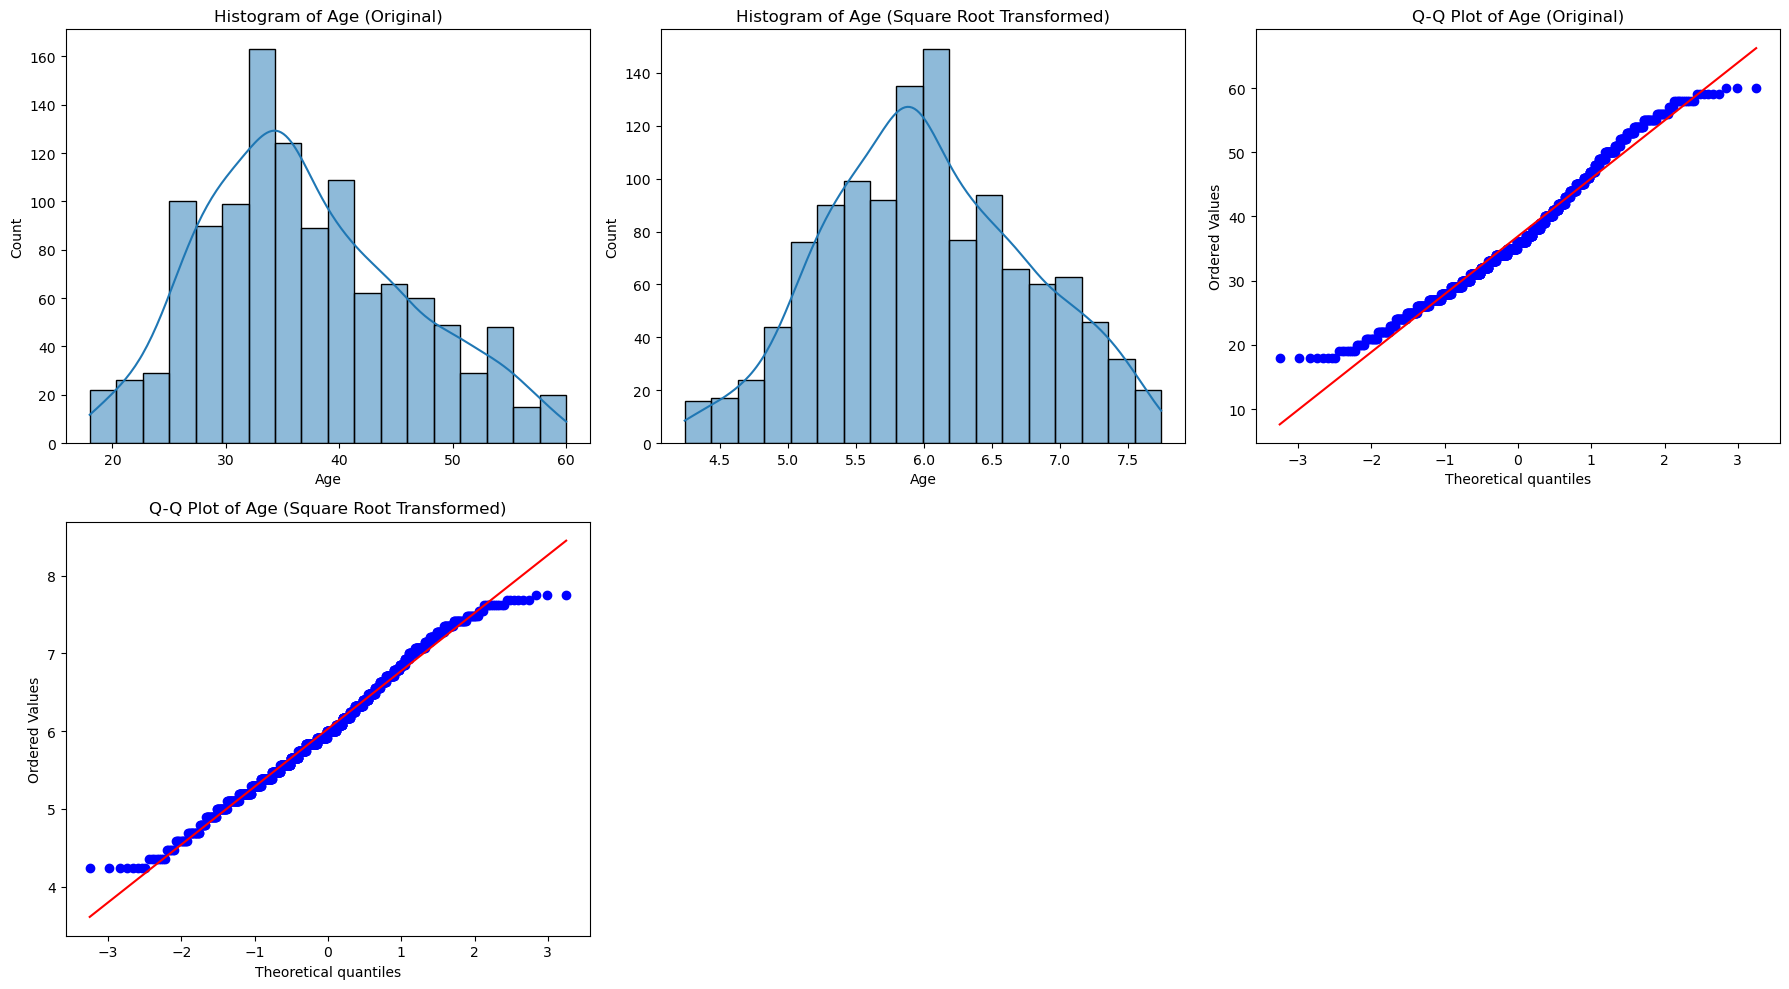


Feature: DistanceFromHome
Original Skewness: 0.96
Skewness after Square Root Transformation: 0.42


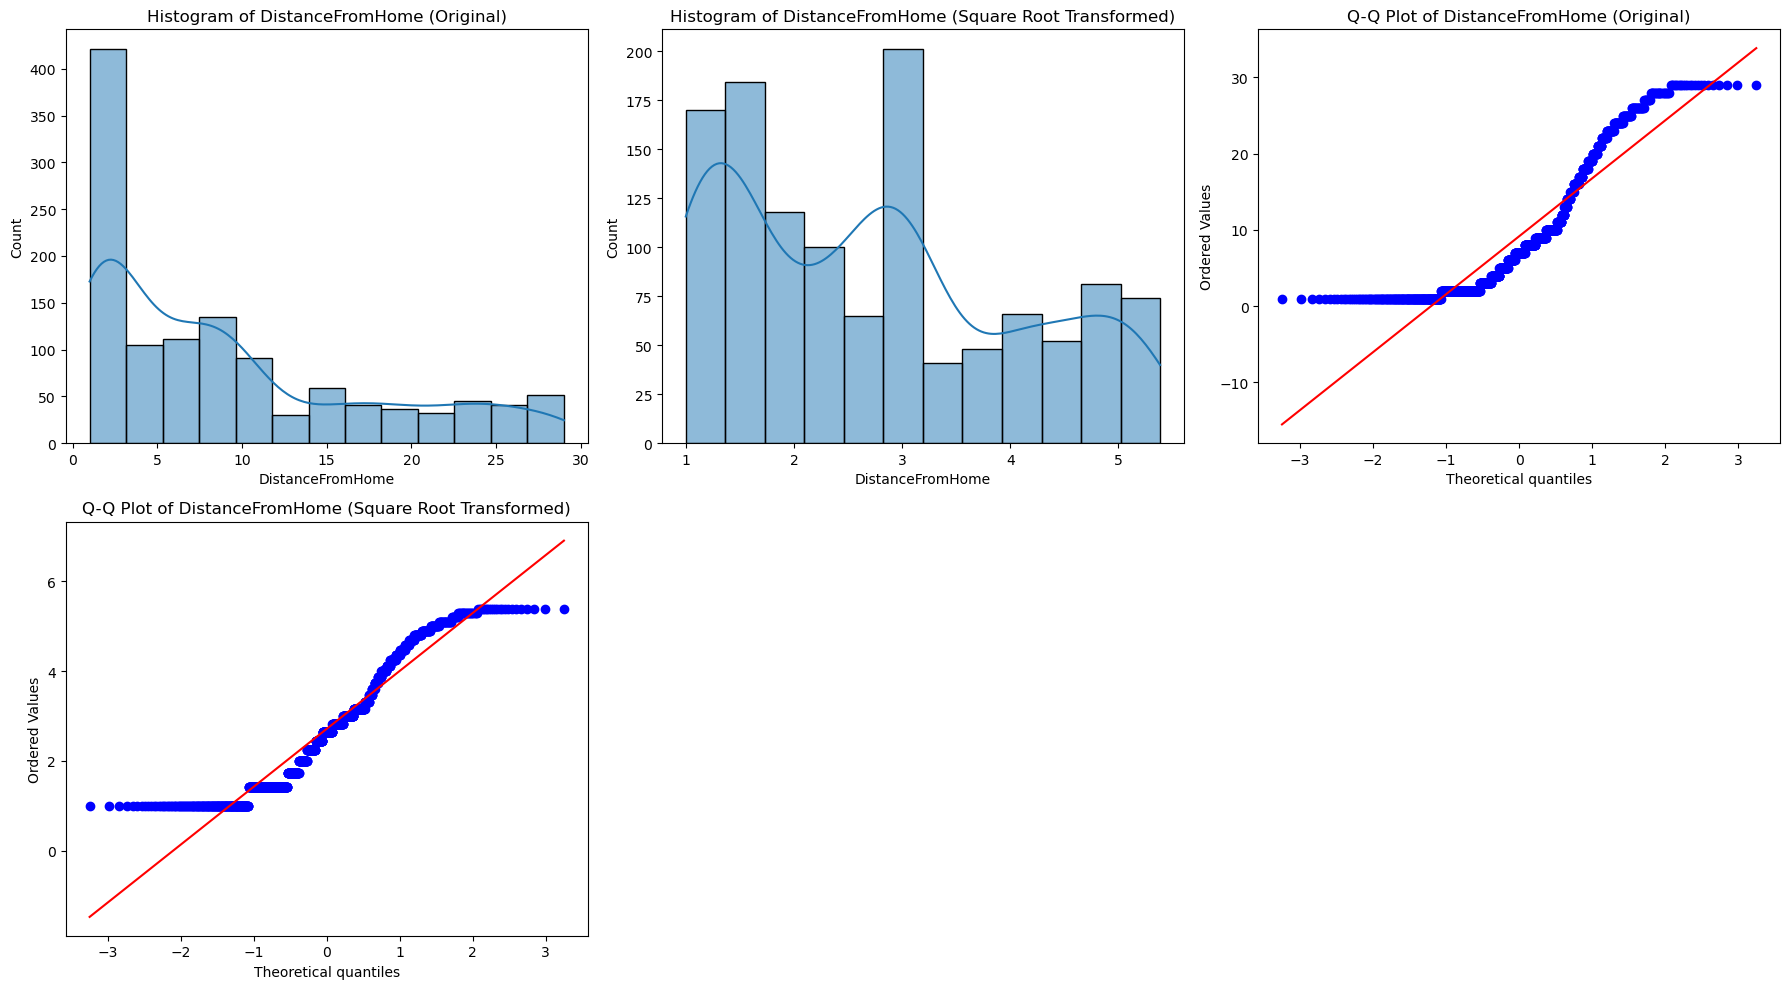


Feature: EmpJobLevel
Original Skewness: 1.02
Skewness after Square Root Transformation: 0.59


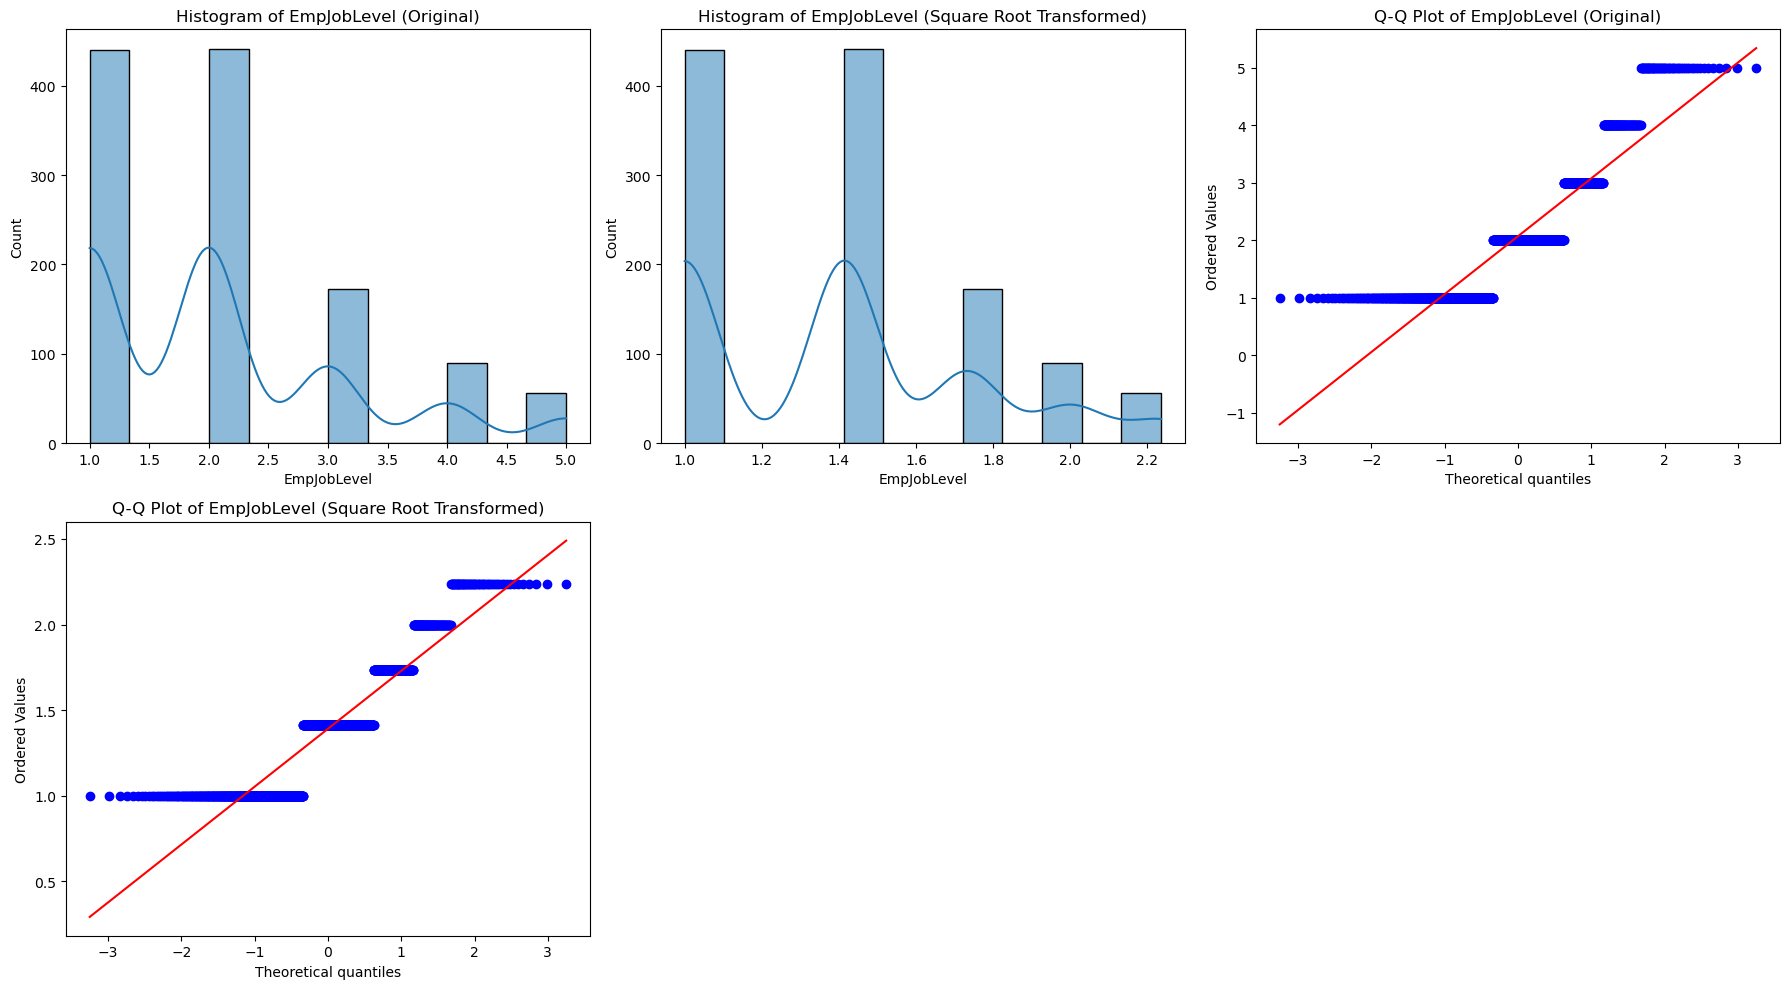


Feature: NumCompaniesWorked
Original Skewness: 1.05
Skewness after Square Root Transformation: 0.04


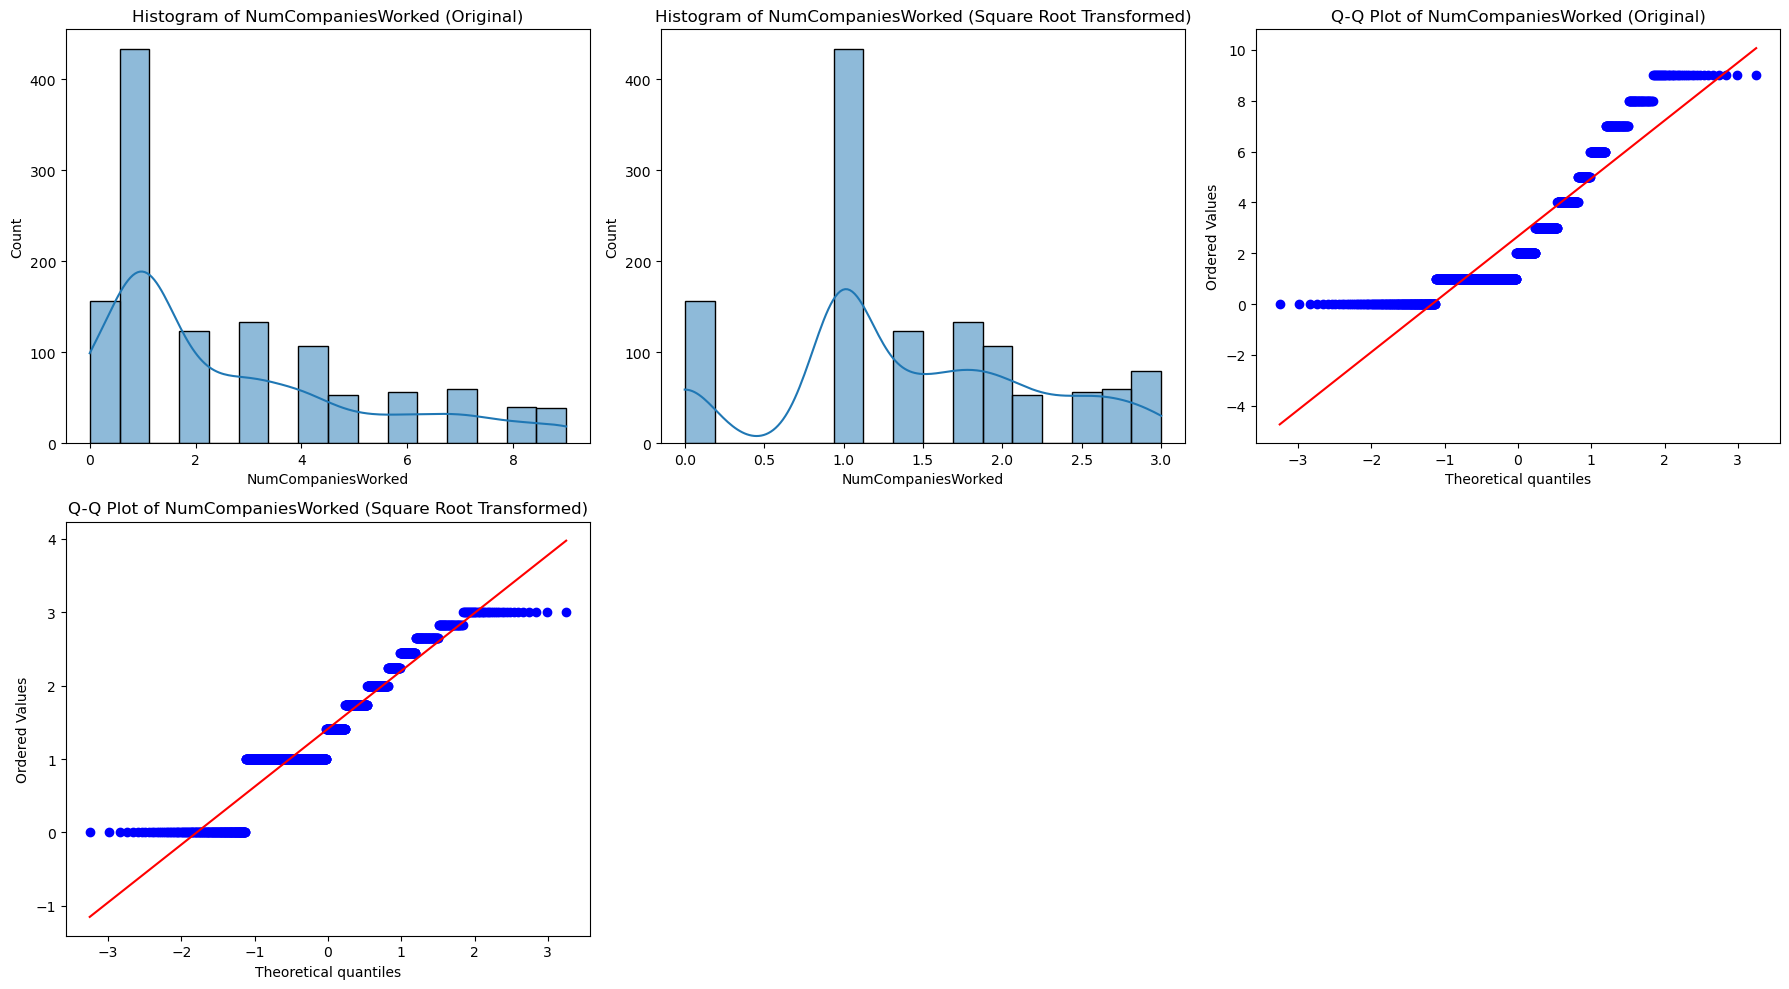


Feature: EmpLastSalaryHikePercent
Original Skewness: 0.81
Skewness after Square Root Transformation: 0.64


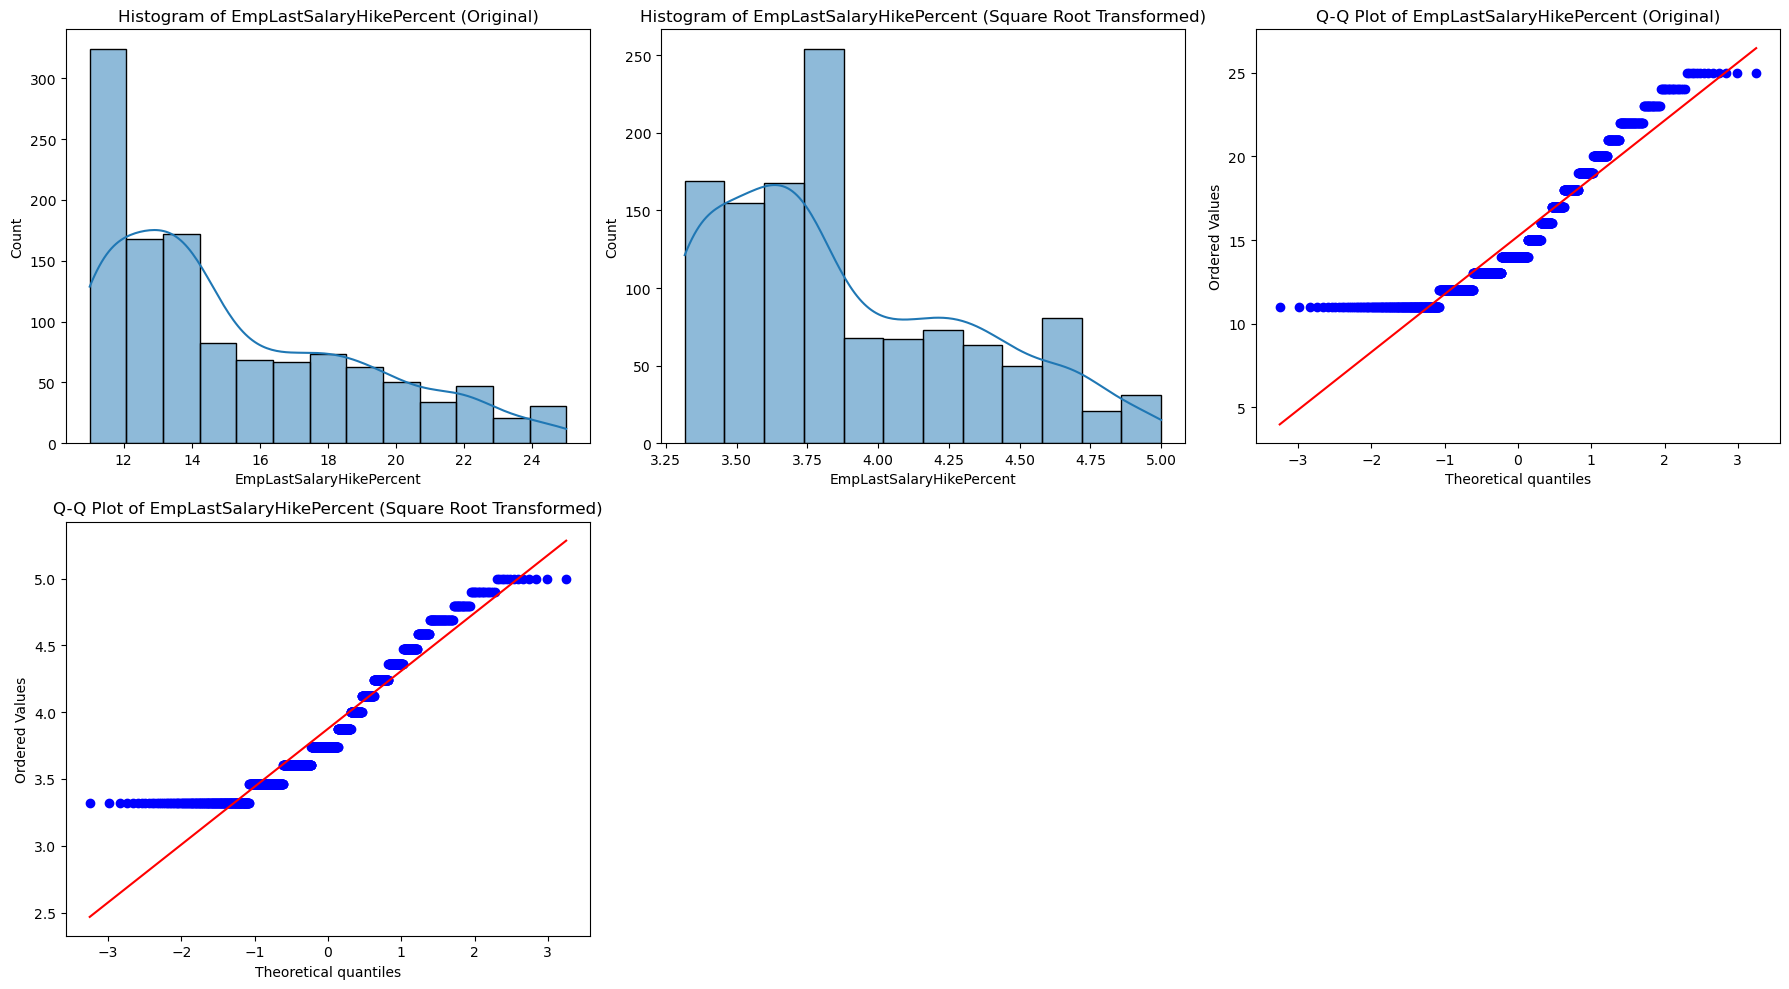


Feature: TotalWorkExperienceInYears
Original Skewness: 0.80
Skewness after Square Root Transformation: -0.12


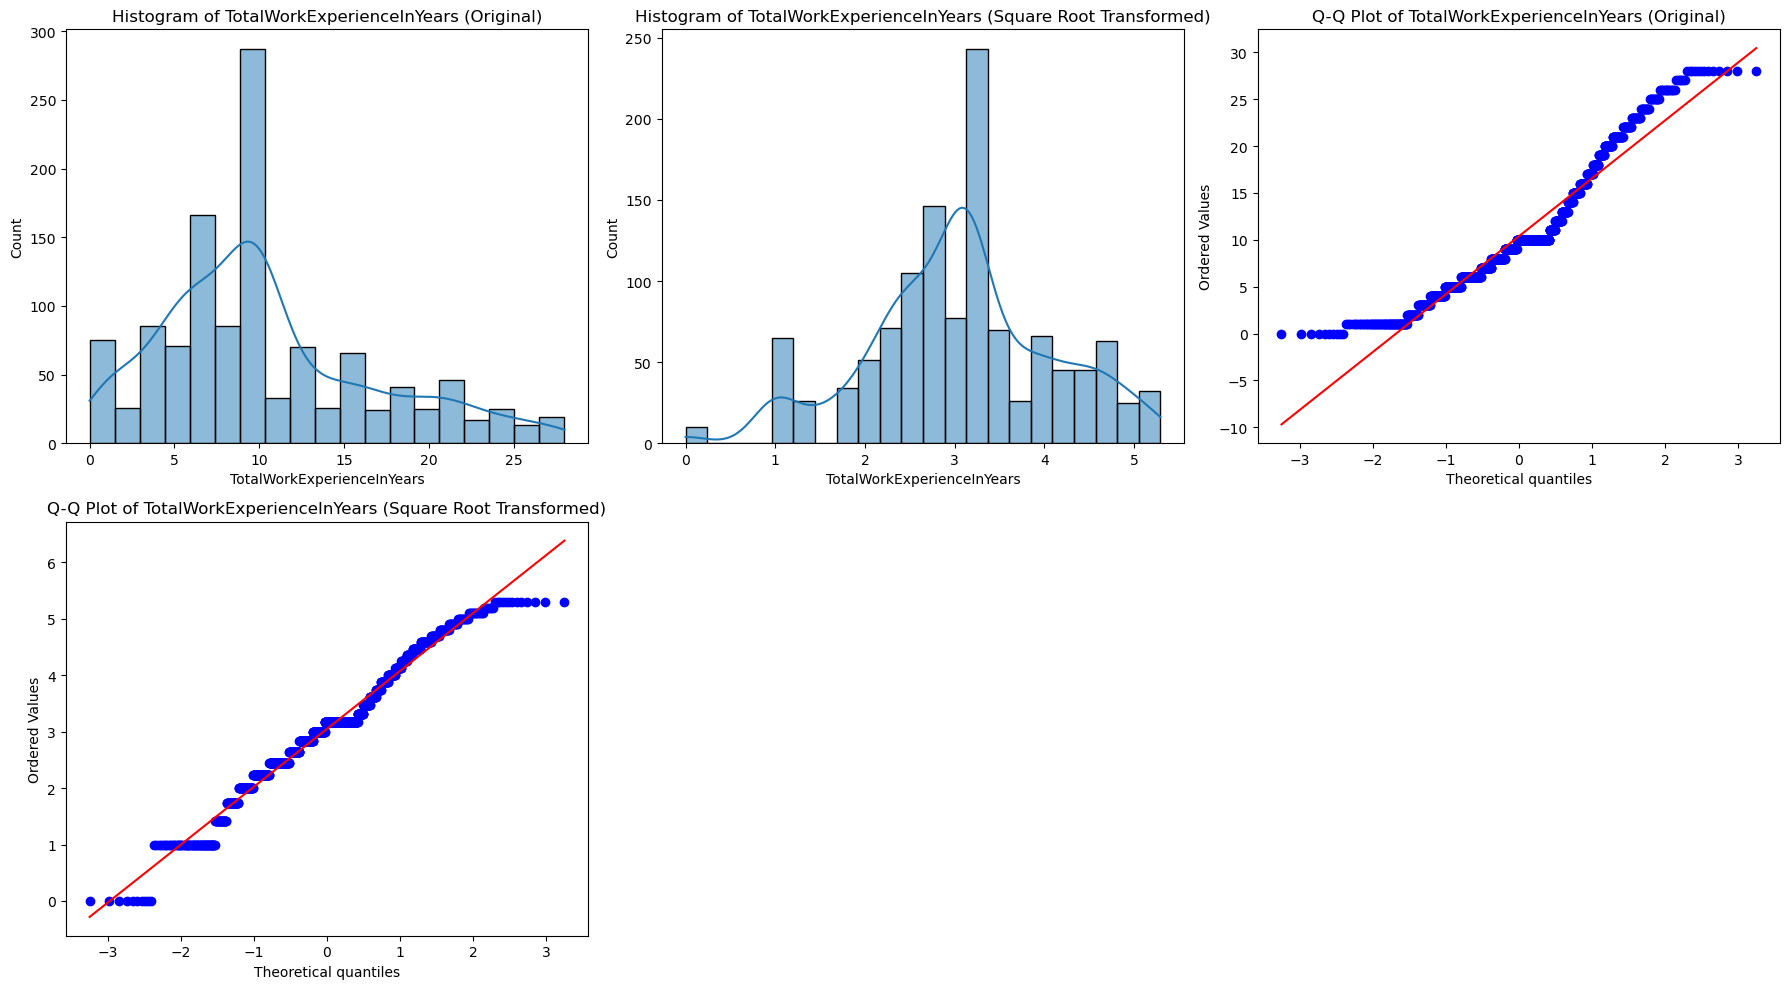


Feature: ExperienceYearsAtThisCompany
Original Skewness: 1.09
Skewness after Square Root Transformation: 0.00


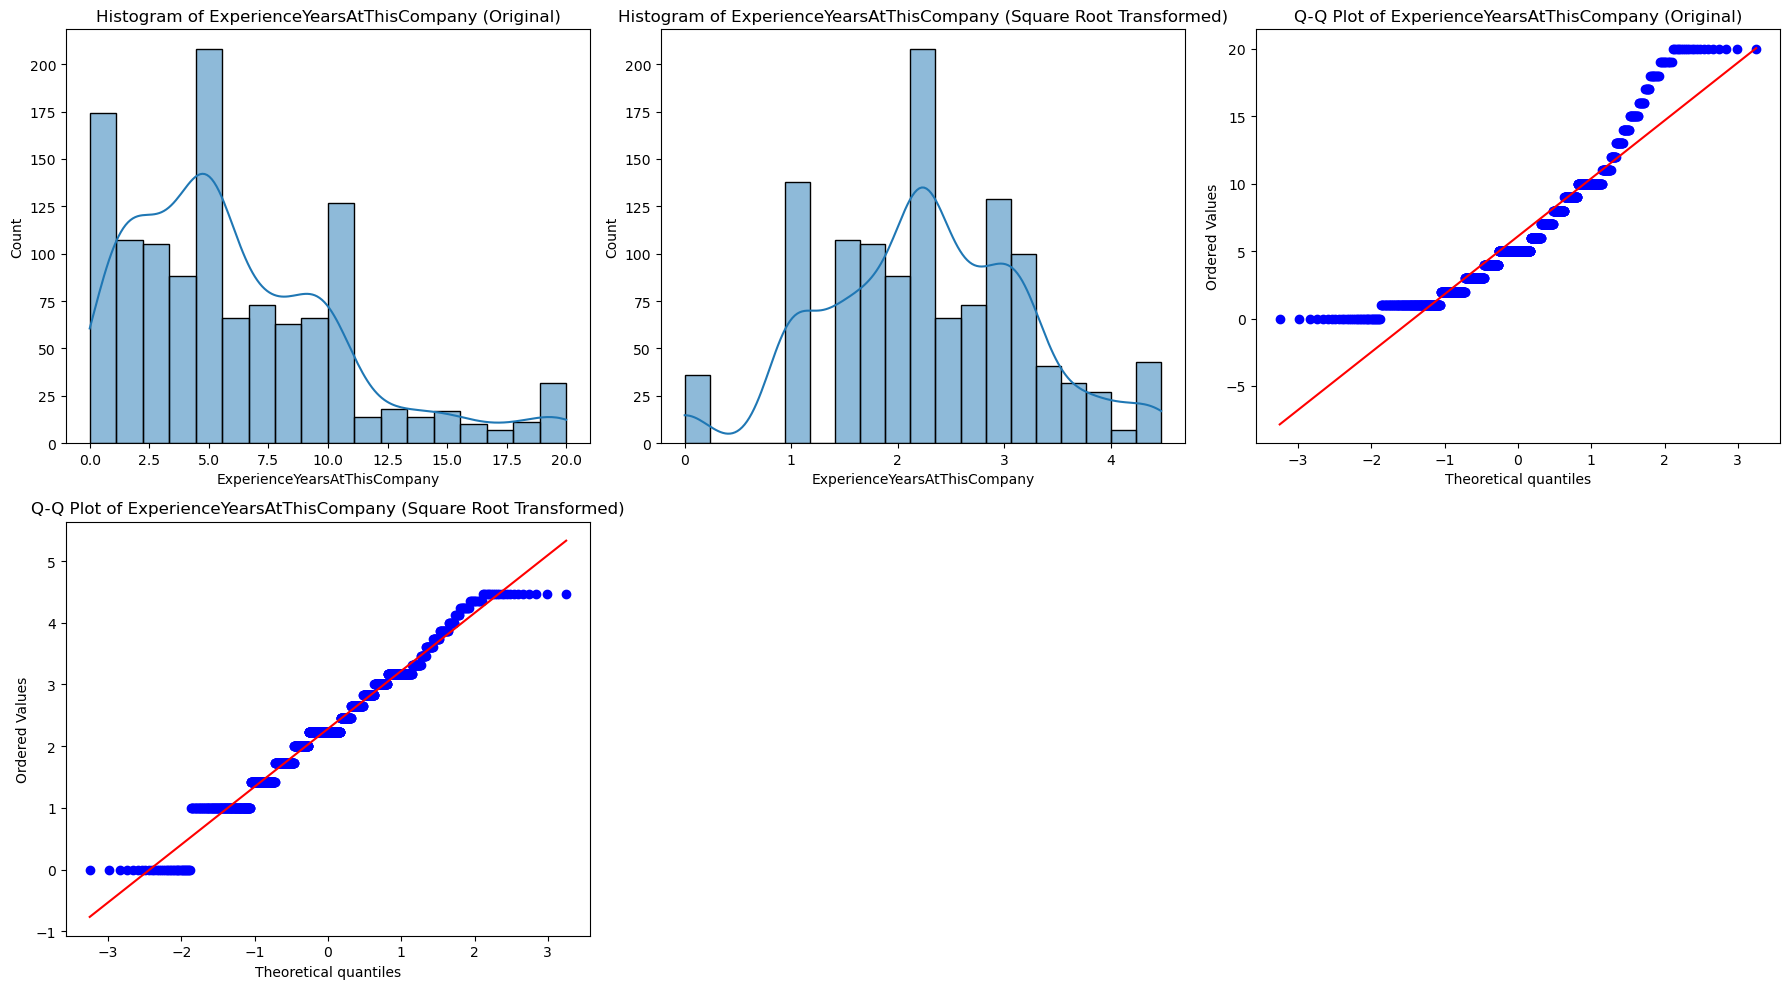


Feature: YearsSinceLastPromotion
Original Skewness: 1.66
Skewness after Square Root Transformation: 0.50


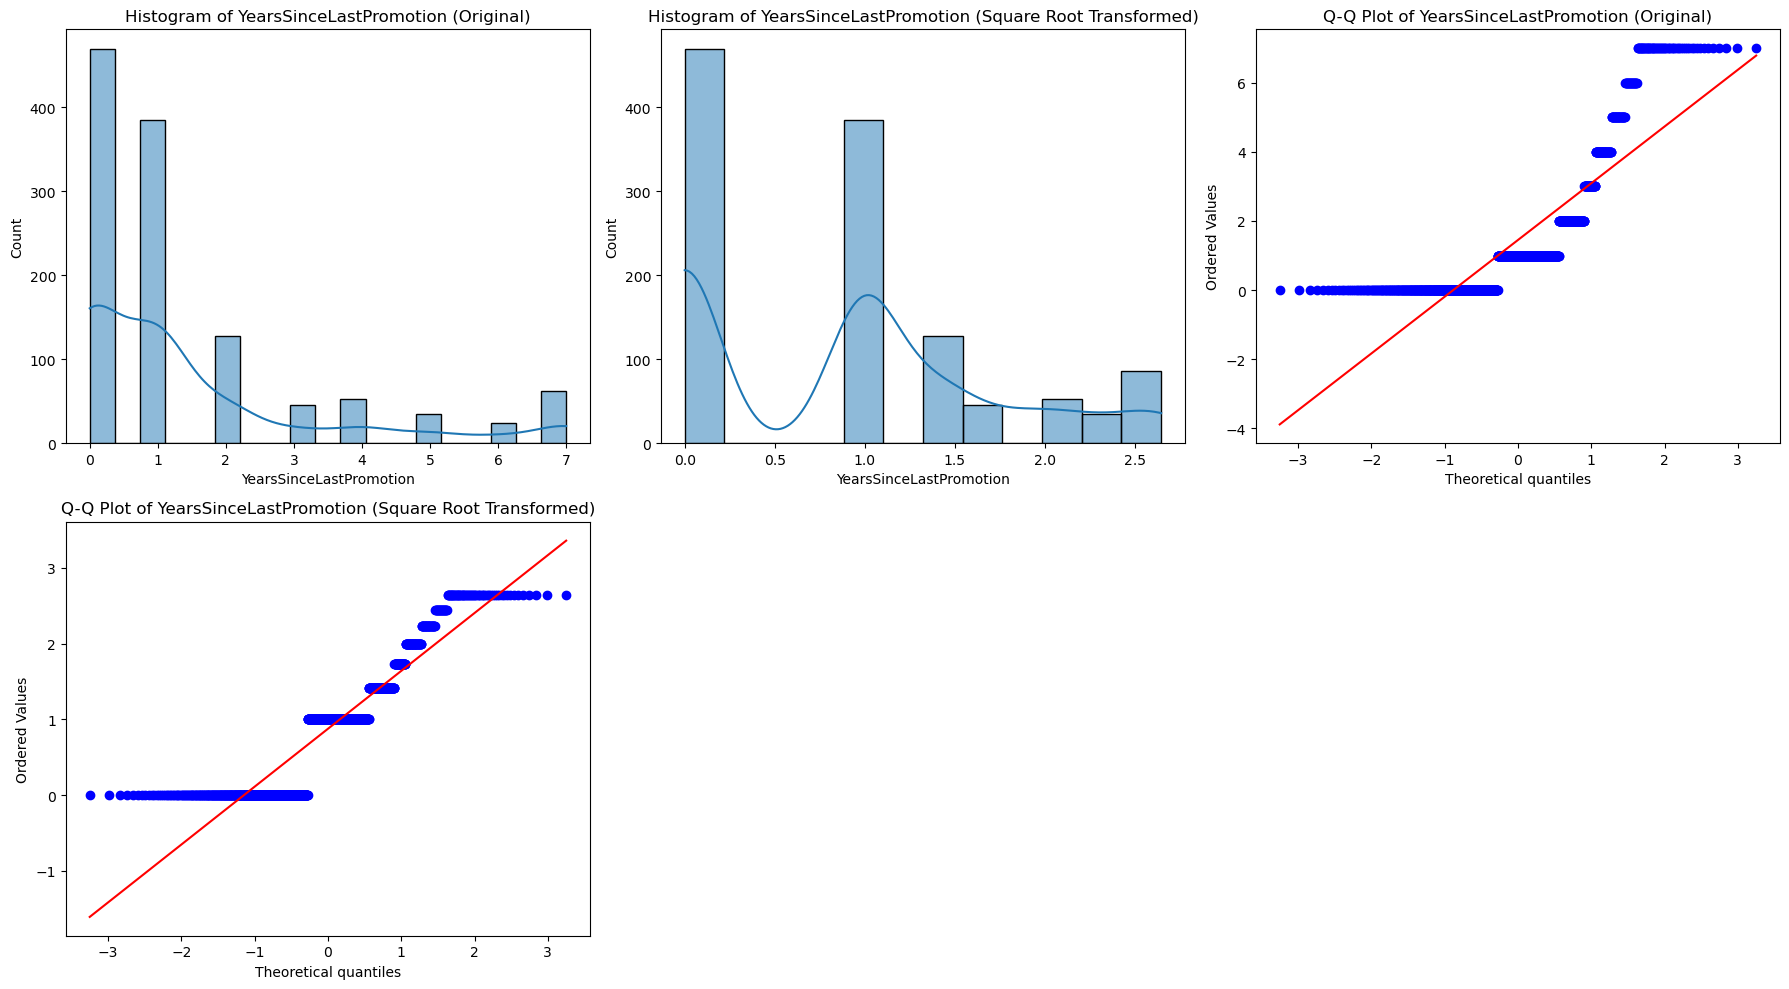

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, probplot

def apply_sqrt_transformation(df, *column_names):
    """
    Apply square root transformation to multiple numerical features and visualize the results.
    
    Parameters:
    - df: DataFrame containing the data.
    - column_names: List of numerical column names to transform.
    """
    for column_name in column_names:
        if column_name not in df.columns:
            print(f"Column '{column_name}' not found in DataFrame.")
            continue
        
        # Drop missing values
        data = df[column_name].dropna()
        
        # Apply square root transformation
        transformed_data = np.sqrt(data)
        
        # Calculate skewness for original and transformed data
        original_skewness = skew(data)
        transformed_skewness = skew(transformed_data)
        
        print(f"\nFeature: {column_name}")
        print(f"Original Skewness: {original_skewness:.2f}")
        print(f"Skewness after Square Root Transformation: {transformed_skewness:.2f}")
        
        # Plotting
        plt.figure(figsize=(18, 10))
        
        # Histogram of original data
        plt.subplot(2, 3, 1)
        sns.histplot(data, kde=True)
        plt.title(f'Histogram of {column_name} (Original)')
        
        # Histogram of transformed data
        plt.subplot(2, 3, 2)
        sns.histplot(transformed_data, kde=True)
        plt.title(f'Histogram of {column_name} (Square Root Transformed)')
        
        # Q-Q Plot of original data
        plt.subplot(2, 3, 3)
        probplot(data, dist="norm", plot=plt.gca())
        plt.title(f'Q-Q Plot of {column_name} (Original)')
        
        # Q-Q Plot of transformed data
        plt.subplot(2, 3, 4)
        probplot(transformed_data, dist="norm", plot=plt.gca())
        plt.title(f'Q-Q Plot of {column_name} (Square Root Transformed)')
        
        plt.tight_layout()
        plt.show()

# Example usage
apply_sqrt_transformation(df,'Age', 'DistanceFromHome','EmpJobLevel', 'NumCompaniesWorked','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','ExperienceYearsAtThisCompany','YearsSinceLastPromotion')




##### SCALING THE DATA
* Standard Scaling: Standardization is the process of scaling the feature, it assumes the feature follow normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.

In [43]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

df[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'YearsSinceLastPromotion']]=scalar.fit_transform(df[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion']])

In [44]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,-0.541458,1,3,1,5,18,2,0.102061,3,...,4,-0.058535,-0.879579,2,0.868276,0.864098,-0.756553,1.202103,1,3
1,E1001006,1.109888,1,3,1,5,18,2,0.591464,4,...,4,1.512870,-0.879579,3,0.200371,0.864098,-0.234492,0.902825,1,3
2,E1001007,0.339260,1,5,2,5,18,1,-0.509693,4,...,3,1.512870,-0.879579,3,2.649355,2.661702,-0.234492,2.399219,1,4
3,E1001009,0.449349,1,0,0,2,11,2,0.102061,4,...,2,1.984292,-0.879579,2,-0.244898,0.564498,-0.234492,0.603546,1,3
4,E1001010,2.541054,1,3,1,5,18,2,0.836165,4,...,4,-0.058535,-2.303999,3,-0.912803,-0.633905,0.287569,-0.593570,1,3


FEATURE SELECTION
DROP UNIQUE AND CONTANT FEATURES

In [45]:
# Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root tr
df.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

CHECKING CORELATION
Heatmap: A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

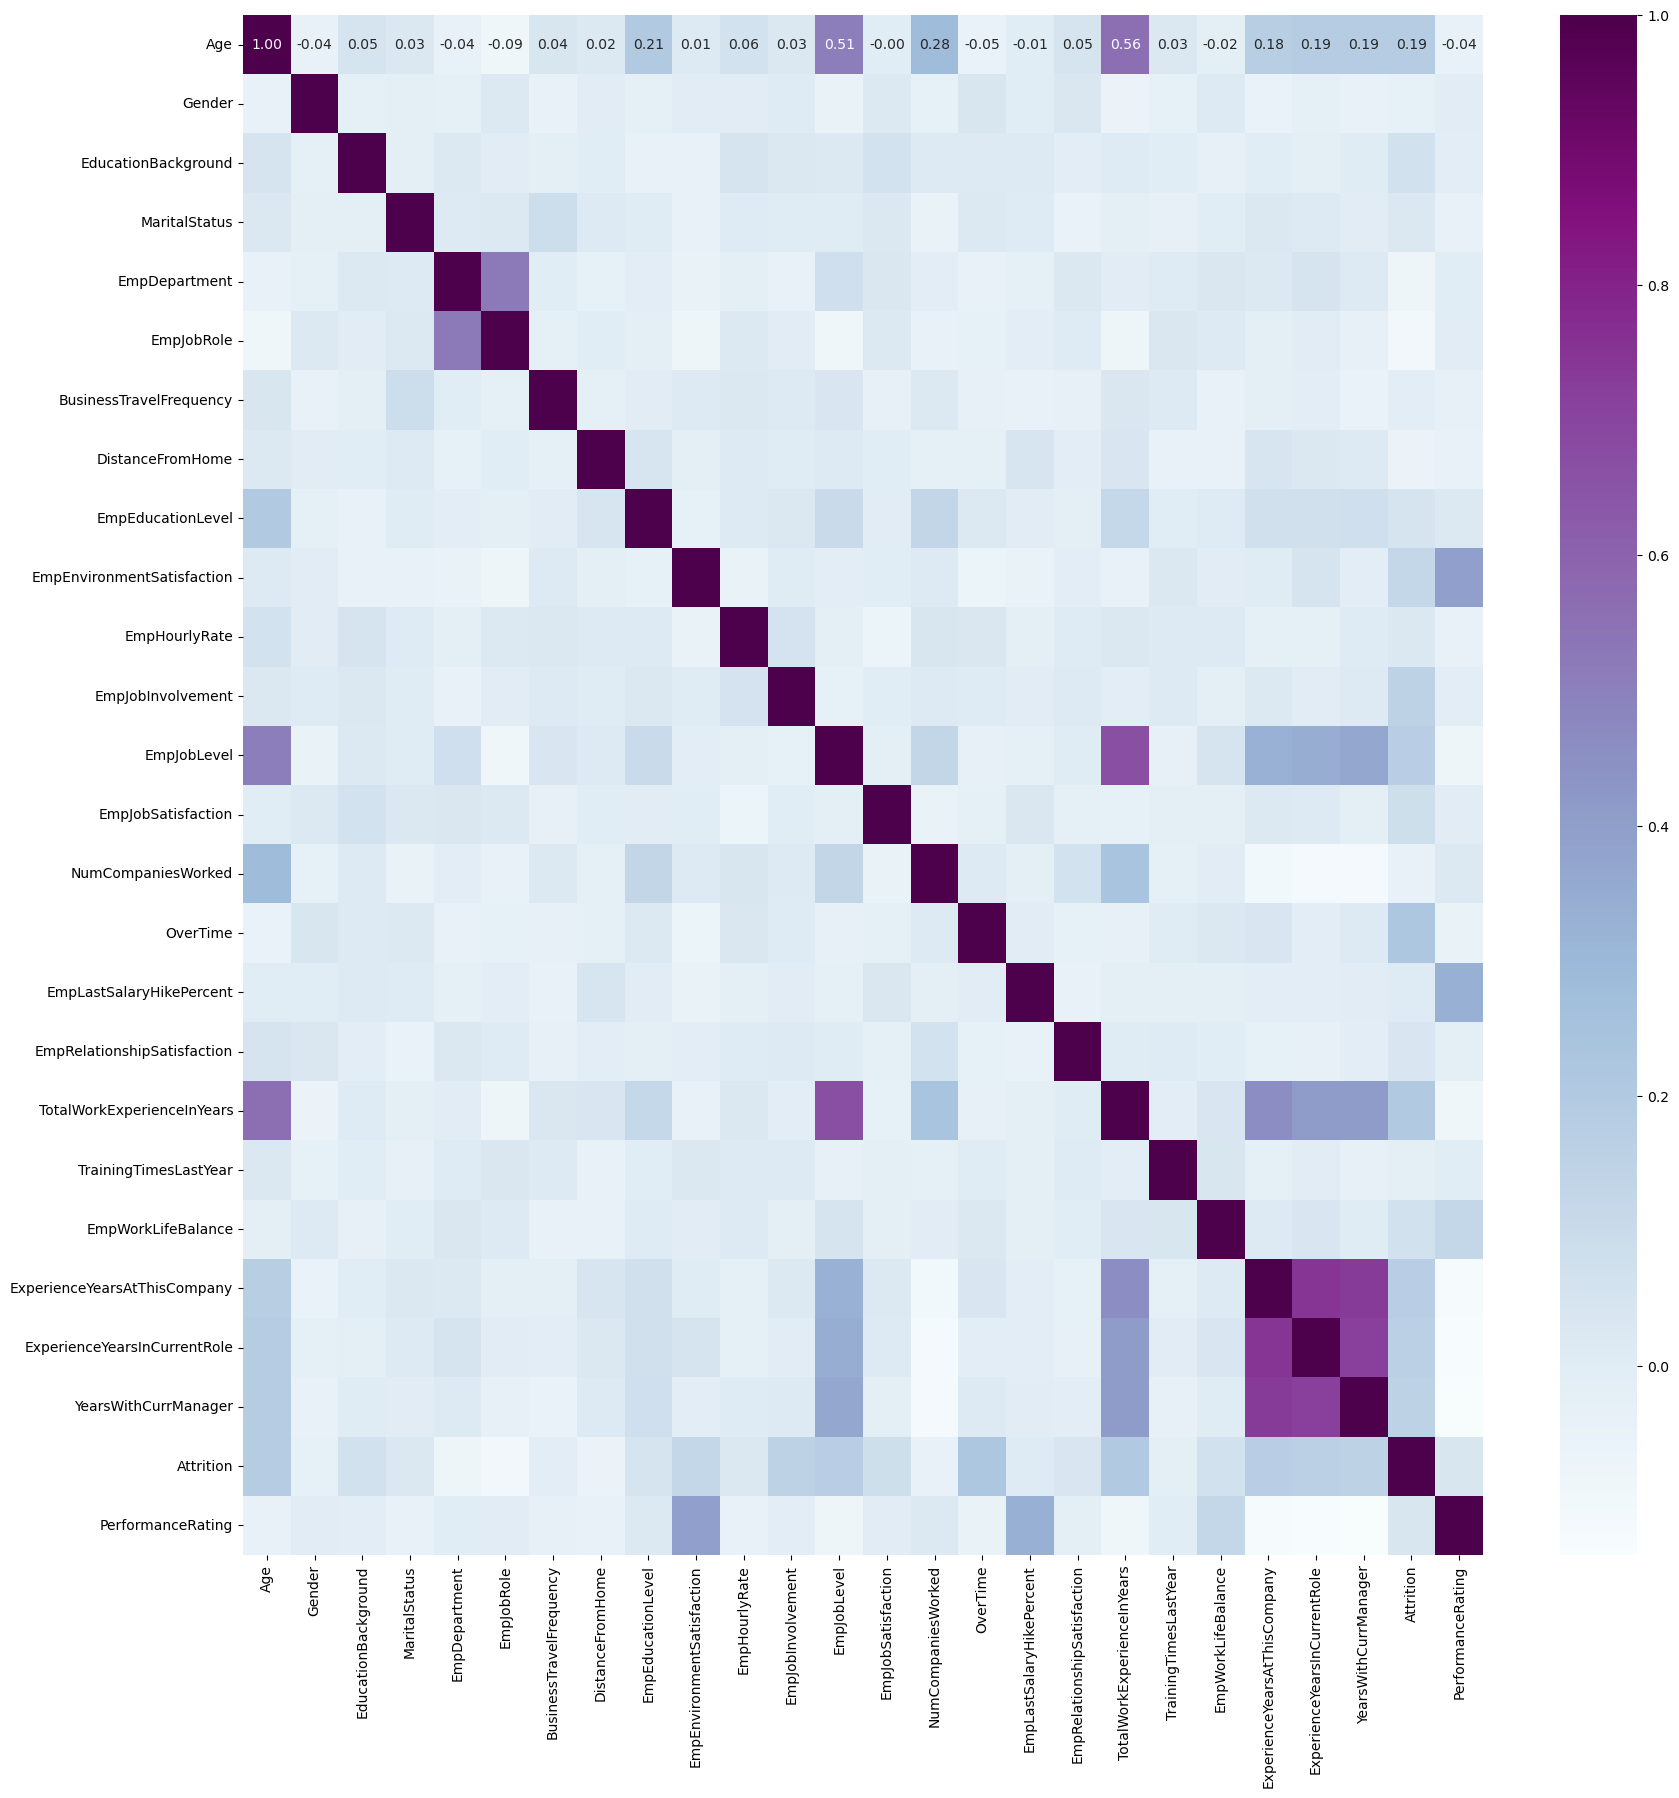

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='BuPu', fmt=".2f") 
plt.show()

In [47]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


* Now we confirm their is no highly correlated feature is present.

##### CHECKING DUPLICATES

In [48]:
df.duplicated().sum()

0

* Their is no Duplicates is present in data.

#### PRINCIPLE COMPONENT ANALYSIS
* Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset.

Used For: The dataset contain more than 25 feature, removes the noise in the data and keeps only the most important features in the dataset. That will mitigate the overfitting of the data and increase the model's performance.

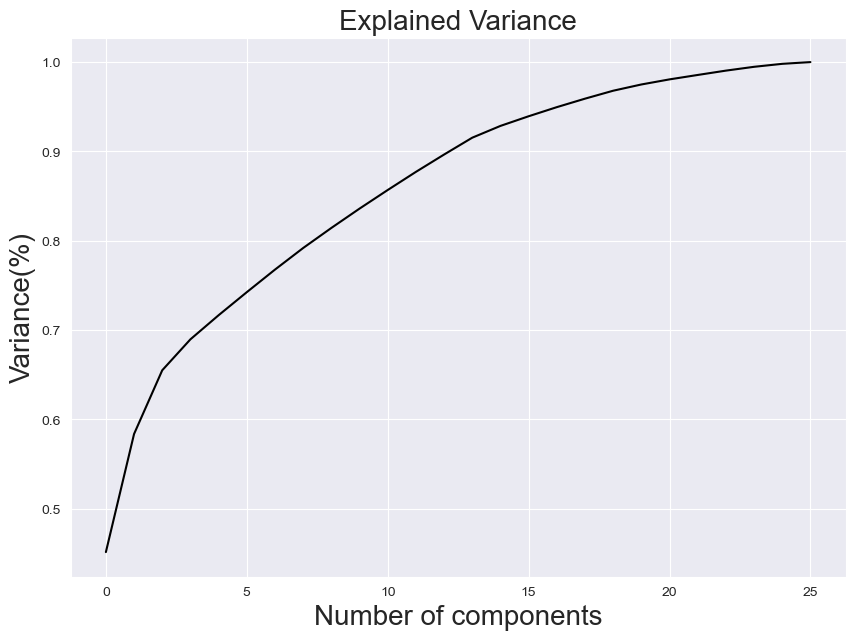

In [49]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(df)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

Observation: Data is contain total 27 feature after dropping unique and constant column,from above PCA it shows the 25 feature has less varaince loss, so we are going to select 25 feature.

In [50]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(df)
new_data

array([[-4.47461716e+00, -1.63560593e+00,  1.35987621e+00, ...,
         3.10695715e-01, -2.73622936e-01, -1.62067879e-01],
       [-4.35738815e+00, -5.78705541e-02,  2.03984914e+00, ...,
        -1.75001965e-01, -6.84618293e-01, -2.95399760e-04],
       [-4.24499121e+00,  2.58127897e+00,  4.42478564e+00, ...,
        -2.47450319e-01,  7.45476759e-01, -3.71271973e-01],
       ...,
       [ 1.63617185e+00, -1.70581162e+00,  2.93429334e+00, ...,
         3.82850443e-01,  1.12063899e+00, -1.59847038e-02],
       [ 9.09432080e+00, -2.06377521e+00,  9.51413543e-01, ...,
        -1.06420004e-01, -3.93245664e-01,  1.57389654e-01],
       [-4.36719775e+00,  5.98465271e+00, -2.44147010e+00, ...,
        -1.08101073e-01, -1.21159952e-01,  5.08514388e-01]])

In [51]:
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=df.PerformanceRating

principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.474617,-1.635606,1.359876,0.965490,-1.550080,0.179717,0.843739,-1.594458,0.749029,-0.020451,...,0.106931,-0.601961,0.097510,0.039537,-0.287547,-0.451346,0.310696,-0.273623,-0.162068,3
1,-4.357388,-0.057871,2.039849,1.537299,0.291088,1.628643,0.763073,0.155870,1.045583,0.797368,...,-0.358400,0.423352,-0.879996,-0.539284,-0.275408,-0.922157,-0.175002,-0.684618,-0.000295,3
2,-4.244991,2.581279,4.424786,-0.162870,-1.914806,1.102650,-1.479360,0.442567,0.838079,1.505285,...,0.507253,0.461541,0.188903,-0.380440,0.173953,-0.417505,-0.247450,0.745477,-0.371272,4
3,3.012637,0.735434,2.433771,3.347248,1.326405,-2.357479,1.226972,0.340809,-0.223106,-0.053884,...,0.891003,-1.504801,0.590889,0.202439,0.223840,-0.577573,-0.024454,-0.471628,-0.471033,3
4,-4.249783,5.975149,-0.464801,0.783218,2.877106,0.052133,-0.434443,-0.391564,0.845524,1.203842,...,-0.300831,1.104789,-1.216270,0.843609,0.101158,-0.177141,0.471097,-0.151107,-0.447970,3


In [52]:
principle_df.to_csv('employee_performance_analysis_preprocessed_data.csv')

# Reading new preprocess csv file
dff = pd.read_csv('employee_performance_analysis_preprocessed_data.csv')

# Get first five rows 
dff.head()

,Unnamed: 0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,0,-4.474617,-1.635606,1.359876,0.965490,-1.550080,0.179717,0.843739,-1.594458,0.749029,...,0.106931,-0.601961,0.097510,0.039537,-0.287547,-0.451346,0.310696,-0.273623,-0.162068,3
1,1,-4.357388,-0.057871,2.039849,1.537299,0.291088,1.628643,0.763073,0.155870,1.045583,...,-0.358400,0.423352,-0.879996,-0.539284,-0.275408,-0.922157,-0.175002,-0.684618,-0.000295,3
2,2,-4.244991,2.581279,4.424786,-0.162870,-1.914806,1.102650,-1.479360,0.442567,0.838079,...,0.507253,0.461541,0.188903,-0.380440,0.173953,-0.417505,-0.247450,0.745477,-0.371272,4
3,3,3.012637,0.735434,2.433771,3.347248,1.326405,-2.357479,1.226972,0.340809,-0.223106,...,0.891003,-1.504801,0.590889,0.202439,0.223840,-0.577573,-0.024454,-0.471628,-0.471033,3
4,4,-4.249783,5.975149,-0.464801,0.783218,2.877106,0.052133,-0.434443,-0.391564,0.845524,...,-0.300831,1.104789,-1.216270,0.843609,0.101158,-0.177141,0.471097,-0.151107,-0.447970,3
